In [1]:
!powershell -Command "(Get-Content 'utils.py') -replace 'if_online = False', 'if_online = True' | Set-Content 'utils.py'"
!powershell Compress-Archive -Path "global_variables.py", "delete_action.py", "write_action.py", "read_action.py", "timestamp_action.py", "pre_action.py", "algorithm.py", "get_in.py", "main.py", "output.py", "utils.py" -DestinationPath "generated_files/program.zip" -Force

In [ ]:
!python run.py interactor/windows/interactor.exe data/sample_practice.in "python main.py" -d

^C


[INFO] The interactor is starting to run.
wrong answer {"error_code":"unexpected_eoln","score":"0.0000","timestamp":"860","action":"read","role":"player","disk":"1","message":"Unexpected EOLN, next line: []"}


: 

In [1]:
# !python .\run.py .\interactor\windows\interactor.exe .\data\sample_practice.in "python ./demos/python/main.py" -d -r 999

In [3]:
import re

with open("data/sample_practice.in") as f:
    s = f.read()

lines = s.split("TIMESTAMP")
timestamps = []

for line in lines[1:]:
    timestamps.append(line.split("\n")[1:])

In [4]:
object_dict = {
    0: [0, 0],  # id: [size, tag]
}

write_objects = []
delete_objects = []
read_objects = []

In [5]:
delete_objects, write_objects, read_objects = [], [], []

for i in range(0, len(timestamps)):
    timestamp = timestamps[i]
    index = 0
    delete_cmd, write_cmd, read_cmd = [], [], []
    
    delete_num = int(timestamp[0])
    for i in range(index+1, index+1+delete_num):
        delete_cmd.append(timestamp[i])
    
    index += delete_num + 1
    write_num = int(timestamp[index])
    for i in range(index+1, index+1+write_num):
        write_cmd.append(timestamp[i])

    index += write_num + 1
    read_num = int(timestamp[index])
    for i in range(index+1, index+1+read_num):
        read_cmd.append(timestamp[i])
    
    timestamp_delete = []
    for cmd in delete_cmd:
        if not cmd:
            continue
        res = cmd.split(" ")
        res = [_ for _ in res if _]
        obj_id = int(res[0])
        timestamp_delete.append(obj_id)
    delete_objects.append(timestamp_delete)
    
    timestamp_write = []
    for cmd in write_cmd:
        if not cmd:
            continue
        res = cmd.split(" ")
        res = [_ for _ in res if _]
        obj_id = int(res[0])
        obj_size = int(res[1])
        obj_tag = int(res[2])

        object_dict[obj_id] = [obj_size, obj_tag]
        timestamp_write.append([obj_size, obj_tag])
    write_objects.append(timestamp_write)
        
    timestamp_read = []
    for cmd in read_cmd:
        if not cmd:
            continue
        res = cmd.split(" ")
        res = [_ for _ in res if _]
        requist_id = int(res[0])
        obj_id = int(res[1])

        timestamp_read.append([obj_id, requist_id])
    read_objects.append(timestamp_read)

In [7]:
len(read_objects)

86505

In [4]:
def log(string):
    import time
    
    time_str = time.strftime("%H:%M:%S", time.localtime())
    with open("log.log", "a+") as f:
        f.write(f"{time_str}:  {string} \n")

In [5]:
perfect_cost = [0 for i in range(16+1)]
max_perfect_cost = [0 for i in range(16+1)]
timestamp_cost = 0

for i in range(86400):
    for obj_id in delete_objects[i]:
        if obj_id:
            tag = object_dict[obj_id][1]
            size = object_dict[obj_id][0]
            perfect_cost[tag] -= size
    
    for obj_id in write_objects[i]:
        if obj_id:
            tag = object_dict[obj_id][1]
            size = object_dict[obj_id][0]
            perfect_cost[tag] += size
    
    for i in range(16+1):
        max_perfect_cost[i] = max(max_perfect_cost[i], perfect_cost[i])
    
    timestamp_cost = max(timestamp_cost, sum(perfect_cost))


TypeError: unhashable type: 'list'

In [ ]:
log(timestamp_cost * 3)
log(max_perfect_cost, sum(max_perfect_cost))
log(5792 * 10)

In [8]:
with open("data/sample_practice.in", "r") as f:
    s = f.readlines()[0:50]

read_count = s[33:49]
write_count = s[17:33]
delete_count = s[1:17]

In [6]:
read_count[0]

'   476    367    257    165     93    176    285    428    421    606    465    377    331    161    111    116    198    317   8067  71906 114515 106530  59697  33172  46479  57658  64951  70291  72796  69675  64229  55654  44766  31469  16690   2874    110   6307  28861  47472  61750  69091  68326  61130  45982  25795  11587   8244\n'

In [9]:
delete_freq = [[] for _ in range(16)]

for i, count in enumerate(delete_count):
    freq = [_ for _ in count.split(' ') if _]
    for _ in freq:
        delete_freq[i].append(int(_))
        
write_freq = [[] for _ in range(16)]

for i, count in enumerate(write_count):
    freq = [_ for _ in count.split(' ') if _]
    for _ in freq:
        write_freq[i].append(int(_))
        
read_freq = [[] for _ in range(16)]

for i, count in enumerate(read_count):
    freq = [_ for _ in count.split(' ') if _]
    for _ in freq:
        read_freq[i].append(int(_))

for i in range(len(read_count)):
    delete_count[i] = [int(_) for _ in delete_count[i].split()]
    write_count[i] = [int(_) for _ in write_count[i].split()]
    read_count[i] = [int(_) for _ in read_count[i].split()]

In [14]:
read_sum = [0 for _ in range(48)]

for i in range(len(read_count)):
    for t in range(len(read_count[i])):
        read_sum[t] += read_count[i][t]
print(read_sum)

[3305, 3903, 4217, 4007, 3842, 12062, 89373, 166284, 253227, 309208, 322910, 333844, 358299, 392800, 451293, 477280, 496902, 553385, 571638, 637338, 646002, 611773, 621295, 652875, 615614, 499800, 391676, 403698, 488483, 590307, 626653, 601917, 552989, 529288, 489134, 436996, 469975, 579662, 759965, 797197, 688660, 486629, 352608, 242820, 164305, 89033, 155042, 136577]


In [15]:
sum(read_sum)

19126090

In [8]:
delete_count_all = [0 for i in range(16+1)]
write_count_all = [0 for i in range(16+1)]

for i in range(16):
    delete_count_all[i] = sum(delete_freq[i])
    write_count_all[i] = sum(write_freq[i])
log(delete_count_all)
print(write_count_all)

[2136, 1048, 2276, 1996, 1208, 799, 2048, 1695, 782, 1679, 923, 1876, 764, 1421, 824, 2349, 0]


<Figure size 640x480 with 0 Axes>

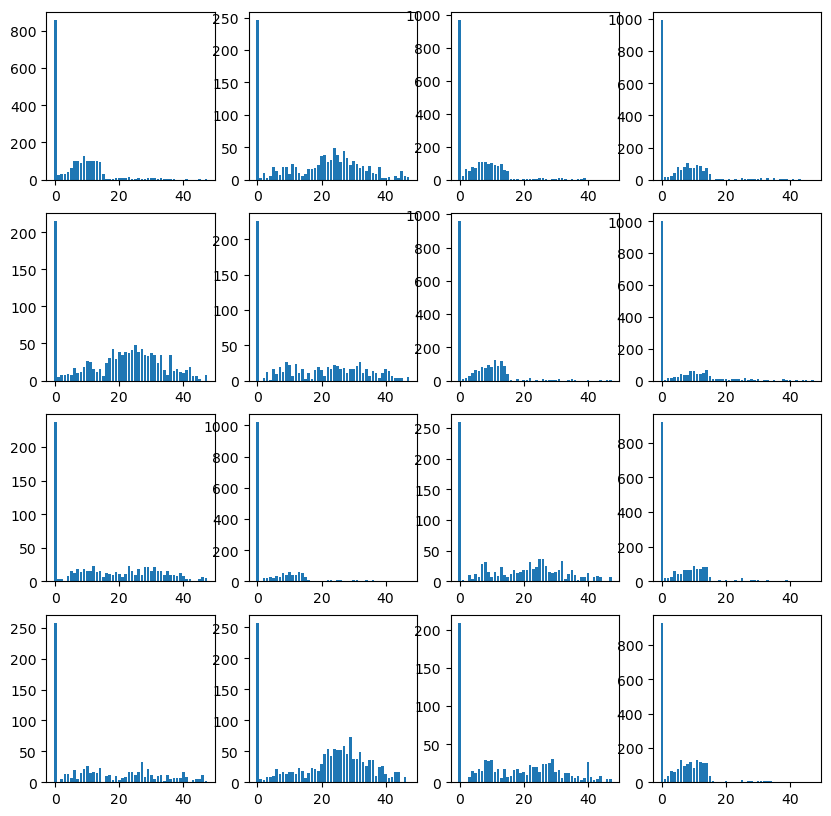

In [10]:
from matplotlib import  pyplot as plt

plt.figure(1)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.bar([_ for _ in range(len(write_freq[i]))], write_freq[i])

In [11]:
perfect_freq = [0 for _ in range(16+1)]
timestamp_cost = 0


max_perfect_freq = [0 for _ in range(16+1)]
for i in range(len(write_count[0])):
    for j in range(len(write_count)):
        perfect_freq[j] += write_count[j][i] - delete_count[j][i]
        max_perfect_freq[j] = max(max_perfect_freq[j], perfect_freq[j])
    timestamp_cost = max(sum(perfect_freq), timestamp_cost)
    

print(perfect_freq)
print(max_perfect_freq)
print(sum(max_perfect_freq) * 3)

[1067, 799, 1585, 836, 944, 502, 1399, 783, 494, 712, 631, 1138, 434, 1107, 545, 1489, 0]
[1968, 799, 2121, 1849, 944, 524, 1933, 1507, 494, 1540, 631, 1715, 436, 1110, 545, 2196, 0]
60936


In [ ]:
read_cost, write_cost, delete_cost = 0, 0, 0
for i, freq in enumerate(read_freq):
    read_cost += sum(freq)

for i, freq in enumerate(write_freq):
    write_cost += sum(freq)

for i, freq in enumerate(delete_freq):
    delete_cost += sum(freq)

print(5792 * 10)
print(read_cost, write_cost * 3, delete_cost * 3)

<BarContainer object of 16 artists>

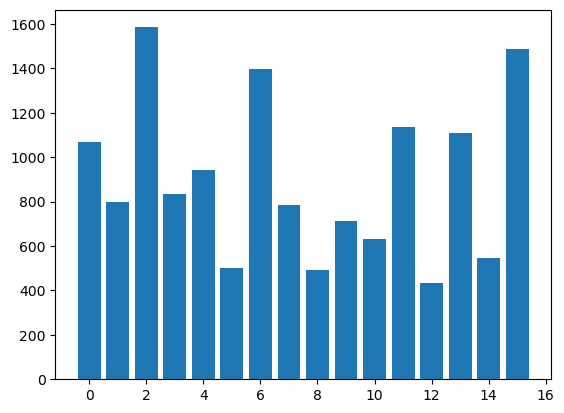

In [12]:
from matplotlib import  pyplot as plt

plt.figure(1)
write_disturbution = [sum(freq) - sum(delete_freq[i]) for i, freq in enumerate(write_freq)]

plt.bar([i for i in range(len(write_disturbution))], write_disturbution)

In [ ]:
write_disturbution

<Figure size 640x480 with 0 Axes>

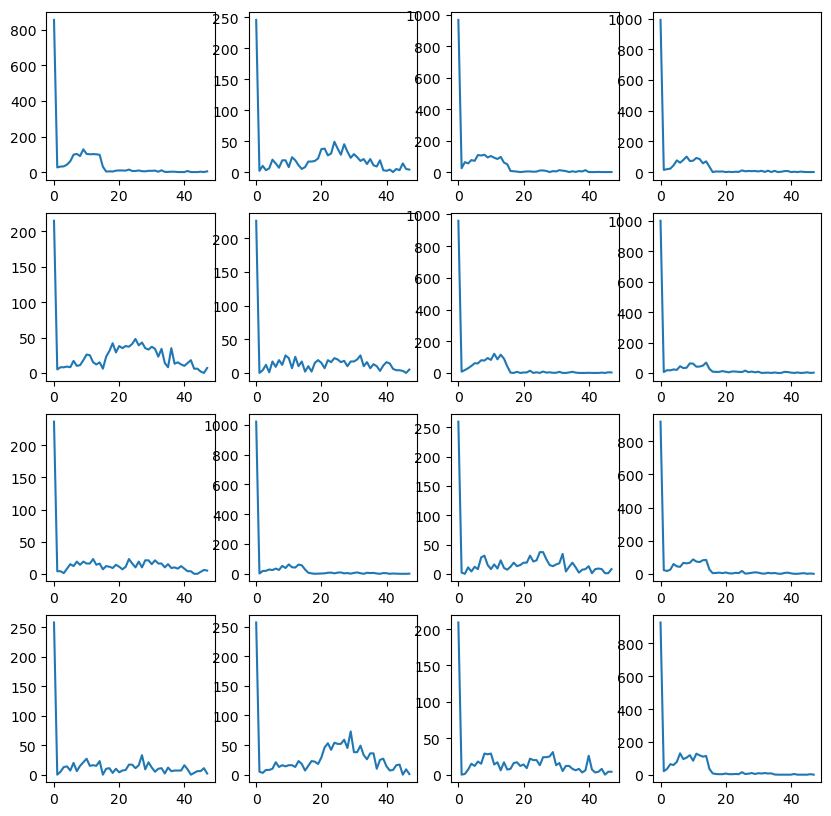

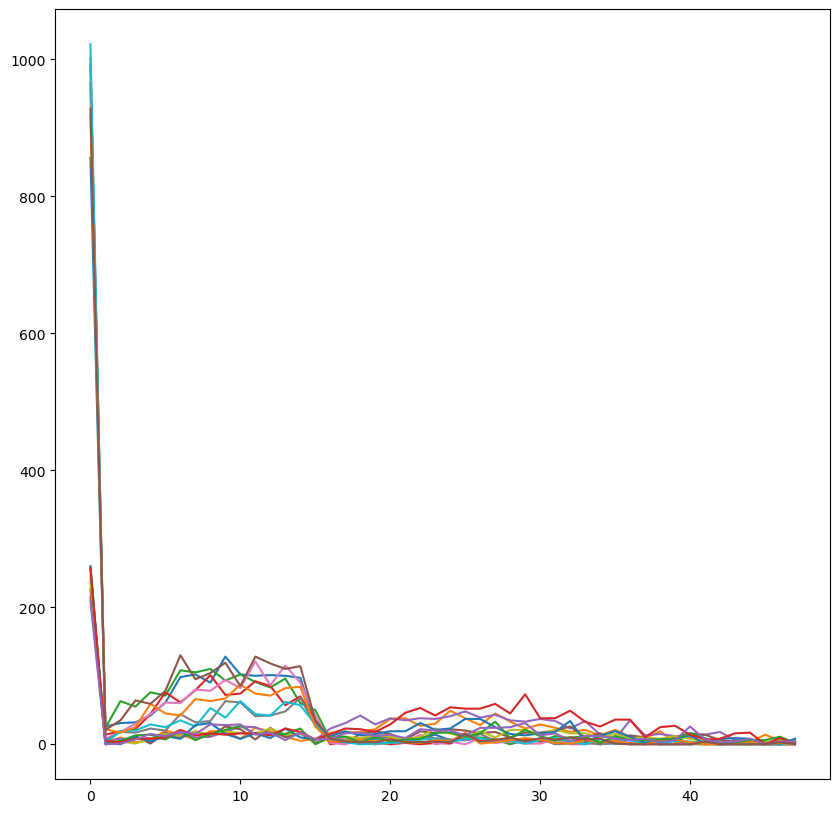

In [14]:
# plot by size in timestamp

from matplotlib import pyplot as plt

plt.figure(1)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.plot(write_freq[i])
    
plt.figure(2)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.plot(write_freq[i])
    
plt.show()